# Analyzing COVID19's Impact on the Stock Market Using Twitter API and NLP

In this notebook we will briefy review natural language processing and display how it can be used to perform text analysis 

# What is Natural Language Processing

Natural language processing or NLP is a branch of AI and machine learning that allows us to process natural(i.e. human) language using machines. So essentially, NLP involves using machines to translate human language. Machine translation of natural language provides a plethora of opportunities. Some of the most popular techniques are that of text and sentiment analysis.

Sentiment analysis is the process of deciphering the mood or attitude of a text. A key task in sentiment analysis is to identify the polarity of a text or word. Polarity is simply the measurement of how positive or negative the word or text is. Another task of sentiment analysis is to assess the subjectivity of a text.The subjectivity task applies a "score" based on how factual a statement is. Identifying the subjectivity can at times be more difficult than determining a text's polarity.

Text analysis is the process of analyzing text documents. This often encompasses the use of techniques from natural language processing.

### NLP Key Terms

Let's get up to speed with some of the key terms involved in Natural Language Processing.

1) Stemming & Lemmatization- stemming and lemmatization are related; stemming is the process of transforming a word into its stem (i.e. from dogs to dog, or from swimming to swim). Lemmatization, though related to stemming, is different in that it is able to return to the lemma or dictionary form of a word.

2) Tokens and Tokenization- these refer to text preprocessing (i.e. getting the text document into a format in which we can work with). Tokenization is the process of partioning bigger text documents into smaller text documents. An example of this is transforming a sentence into a group of words, or tokens.

3) Tokens to Vectors(Bag of Words)- Bag of Words is a model used to tranform text documents into vectors of word counts.

4) Stop Words-words that we want to remove because they don't aid us in interpreting the text (i.e. and, the , of ,etc)

5) Corpus- is the group of all of our text documents

### Applications of NLP

NLP is a vast area. It is used for tasks such as P.O.S. Tagging (i.e. parts of speech), article spinning, named-entity recognition, spam detection, sentiment analysis,etc. 

 Let's say that we want to compare the statement on monetary policy from the European Central Bank to a prior statement issued by the bank. We would first want to get the two statements and find some way to compare them. We would need to featurize them or create features based on the words in each statement. What we are doing in this step is simply creating a vector of the words that are listed in each statement. Each statement would have its own vector of 1s and 0s denoting whether or not a specific word is in that statement.

So to ensure comprehension, every word feature(i.e. the words we use as features) from both statements will be used to create matrices for both statements where the rows are vectors representing each word in the documents.Imagine creating a list of unique words from each statement. If a word is in Statement A, in that index position there will be a 1, if the same word in the same index position is not in Statement B, a 0 will be listed for that word in Statement B's vector. This will be repeated across all the entire vocabulary. So you can see how we can use this to compare two different statements or text documents.

From a math standpoint, cosine similarity is used to determine how similar the two statements are. Below is the equation for cosine similarity.

$$ \large sim(A,B)={\cos(\theta)={A \rm B \over ||A|| \rm ||B||}} $$

This equation is stating that the similarity between points A and B is the cosine of theta, which is the quotient of the product of the vectors A and B and the product of the lengths of A and B. Here theta or the degree or distance between the vectors is a way of denoting similarity. Think in terms of geometry. When we say that two lines are parallel, it denotes that they are adjacent and or similar to each other. However, when we state that a line is orthogonal(i.e. perpendicular; at a 90 degree angle) they are not similar to each other. Using the above equation, we can derive the cosine of theta or some angle created by the vectors. Once we have the cosine, we can then use arccosine or cosine inverse to derive theta or the angle. The angle will tell us the distance between the two vectors and thus how similar they are to each other.

Okay. You may remember the mnemonic SohCahToa from trigonometry:
( $$ \large sine={opposite \over hypotenuse} ,  \large cosine={adjacent \over hypotenuse} ,  \large tangent= {opposite \over adjacent} $$ )

The trig functions $ \sin(), \cos(),$ and $ \tan()$, take in angles of right triangles as inputs and provide information about the ratios of the lengths of the sides of right triangles.

In the cosine similarity equation, $ \large \theta$, theta, is simply the angle created by the two vectors A and B. We can use this angle to determine the similarity. For example, if the angle is 90 degrees, we know that the vectors are perpendicular to each other, and thus they are not similar.

So we are finding the $  \cos()$ of the angle created by our two vectors of words, of which represent our text documents. If $  \cos(\theta)$ is $ 0$, it means that the vectors are orthogonal(i.e. perpendicular) to each other and thus they are not similar. The closer $ \cos(\theta)$ is to $ 1$ the more parallel our vectors are. This is because cosine of 0 degrees is 1. In other words, a cosine of 1 means that the angle between our vectors is 0 degrees and thus they are tranposed on top of each other and are the same. 

The cosine similarity equation is derived from the equation of the dot product. The equation for the dot product is calculated as follows:

$$ \large A x B= ||A|| \rm
||B|| \cos(\theta) $$

Here $ || * ||$ denotes the vector length or magnitude and $\theta$ denotes the angle between $ A$ and $B$.

Using a little algebra, we can use this equation to solve for $ cos(\theta) $ by dividing both sides of the equation by the product of the magnitudes to arrive at our similarity equation above.

This dot product equation is transformed into the cosine similarity equation using the law of cosines. The law of cosines is a law from trigonometry that relates the lengths of a triangle's sides to the cosine of one of its angles. This law generalizes the Pythagorean Theorem (i.e. $ a^2+b^2=c^2$) which is applied only to right triangles.

In essence, we are given two sides and one angle. With this information we apply the law of cosines to find the value for the third side. Recall that the law of cosines can be used for triangles that are not right triangles. The length of the third side is the distance between our vectors.

Keeping with our example, we could further improve our analysis by using term frequency. Term frequency would associate a level of importance of a specific word based on the frequency in which it occurred in the document. Inverse document frequency could also be used and is the importance of a specific word in the corpus, or all the documents. 

Mathematically we could express Term Frequency and Inverse Document Frequency in the following function notation:

Term Frequency= $\large TF(d,t)$

where d is the document and t is the term or word in the document.


Inverse Document Frequency= $\large IDF(t)= {\log({D \over t}) } $

where D is the total number of documents, or in our example total number of statements, t is the number of documents in which that term is found.

To derive the importance of the term, we could then compute the following equation:

$$ \large w_{x,y}={tf_{x,y}  log({N \over df_x})} $$

In the above equation, we are computing the product of the term frequency and inverse document frequency. The $ x$,$y$ notation denotes the frequency of $x$ in $y$. So we are taking the product of the frequency of some word in some document(i.e. $ \large tf_{x,y}$) and the log of the total number of documents(i.e. $\large N$) divided by the number of documents containing $x$ (i.e $ \large df_{x}$ where x is some word).

 In the above example we collect our text data, create features or words that we want to assess each statement by (in this example our word features may be terms or phrases such as moderate growth, modest growth, easing, etc). We remove the stop words or common words that give us no additional information about the text document. We create vectors of each document and store a 1 in the vector if a word in our word features list is there and 0 if it's not. We can then compare the two vectors representing the two text documents. Note this process is similar to that of how spam detection works in your email account. 

# Analysis Concept

The premise of our analysis is that information is slowly diffused into the price of assets. This is akin to the idea behind trading the post earnings drift. A strategy that is based on the release of companies earnings announcements and the price changes over time post announcement. When news is released, some participants will digest and act on this news immediately. However, other participants, usually larger players, will take longer to position themselves congruent with the news. We can gauge the feeling or sentiment behind news releases, as well as the general tone of an asset by using natural language processing to conduct text and sentiment analysis.


So imagine that some news or in general a certain tone is overlaying a specific asset. We would expect this to impact the asset in the current trading session and possibly carry over into the next trading session. Our goal would be to use this sentiment as our indicator of whether to buy or sell.

### Why Aren't Stock Prices Linear?

The fact that stock prices aren't linear using NLP to perform text and sentiment analysis in conjuction with traditional financial analysis techniques. Wait, why aren't stock prices linear?

Okay let's think for a moment. The reason we value stocks using things like P/E, EBITDA, EV/EBIT,EV/EBITDA,etc is because a stock is supposed to be a paper representation of a company. Stated another way, the input into the price of a stock, if we consider the stock price a function of a company, would be it's earnings and other fundamental indicators. These indicators are finite and if they were the only inputs to our stock price function, we could represent the price of a stock as a linear equation. For instance:


$$ \large stock price= f(x) = { \sum_{i=1}^p } {\sum_{n=1}^w} {X_i}{W_n}$$


where p is the number of predictors or features (i.e. revenue, costs, new orders, etc.) and w is the weight assigned to the predictor.

However, the price of a stock at any given time can deviate greatly from the fundamental value of the company. The fundamental value of the company tends to be reflected in the price of stocks over the long term, but over the short term, the prevailing sentiment tends to dominate the price action. We could then update our equation to the following:

$$ \large f(x)= { X_i}{S_n}+e_i = (Earnings Power)(Sentiment)+extremes $$

The price of a stock is not linear because it is not only a function of the earnings power of a company but also the interpretation of a plethora of data that could or could not be directly related to the firm, but cause market participants to trade the stock, thus changing the firms stock price and perceived enterprise value. This is what creates valuation discrepanies that value investors look to arbitrage. The $ \large e_i $ term indicates the inclusion of extremes. Extremes occur when the reaction to some phenomenon or event is so far from reality that a retracement is inevitable. 

Though I've written this relationship in a linear form, Sentiment is a nonlinear variable of which causes the price of stocks to be nonlinear. So you can think of it in terms of some tranformation akin to polynomial regression, splines, etc.

A key reason why Sentiment is nonlinear and thus the prices of stocks are nonlinear is due to Sentiment being a continuous random variable. Recall, that in order to derive the probability of a continuous random variable you must view it within some interval, otherwise, its probability is 0. Sentiment functions similarly. Sentiment is continuously random because it is the composition of an infinite number of possible events that can affect the price of the stock. Some of these events are recurring, such as synchronous news. But others are black swans like the unpegging of the EUR/CHF, Brexit, and the U.S. 2016 election and now COVID-19. Thus, stock prices reflect sentiment inside of some interval. We can never know all of the possibilites of these events that create sentiment and thus stock prices behave nonlinearly. One example of this is when a company reports positive earnings, or even when some positive news comes out in general and assets trade inversely to the news announcement; the "good news is bad news" and vice versa phenomenon. This is just one way to see nonlinearly in asset prices.

In other words, Sentiment itself is a function. It takes in a myriad of data, events, news, etc. and returns an overall Sentiment toward an asset, a sector, industry, country, etc. A good  example of this is the "risk on risk off" mantra. We can write Sentiment as an equation:

$$ \large Sentiment= g({x})={X_1}w_1 + {X_2}w_2+........+{X_p}w_n+e_p $$

where $\large X_p$ are events, $\large W_n$ are weights, and $\large e_p$ are extremes of each event.

Thus we can combine our original equation and our sentiment equation to generate the following as the final representation of a stock's price:

$$ \large h(x)= f(x) \times W_1 + g(x) \times W_2 $$

where $ f(x) $ is our equation representing the fundamental value of the stock (i.e. based on earnings power) and $g(x)$ is our equation representing the effect of sentiment on the stock.

$W_1$ and $W_2$ are weight matrices representing the corresponding importance of each equation. This is reflected in the fact that at times, the fundamental value of the underlying company will dominate the movement in the stock's price and at other times the prevalent sentiment will dominate the movement in the stock's price.

Now that we have a better understanding of what Sentiment is in the context of its effect on asset prices, we can proceed to design a method for analyzing the effect of COVID-19. 

Let's get started!

#  Implementation

Let's take a moment and think about what we'll need to conduct our analysis.Our goal is to use NLP and text analysis to show how information about the corona virus can affect the sentiment of a stock. We'll need to get tweet data from Twitter. We'll also need a way to collect stock trading activity.

There are a few other things that we want to consider. How will we search for stocks? We will need a way to get every ticker symbol in the S&P and store it in an array or list and create a method that uses this list to return how the stock traded after a coronavirus tweet. We'll also want to create a benchmark period as a baseline so that we can compare what the stock's activity was prior to the coronavirus and afterward.

Let's get started!

We'll begin by importing our usual libraries.

In [2]:
#data analysis and manipulation
import numpy as np
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.simplefilter("ignore")

In [223]:
from IPython.display import Image

We'll also need some additional libraries that will allow us to work with text data. 

In [3]:
#importing Beautiful Soup, and NLTK
from bs4 import BeautifulSoup
import nltk

### Getting Data From Twitter


Before building our model let's cover how we can retrieve data from Twitter. To do so you will need a Twitter account. Once you sign up, you can navigate to https://www.apps.twitter.com. The page you arrive at should look like the following:

### "insert apps_twitter_pic1.jpg here"

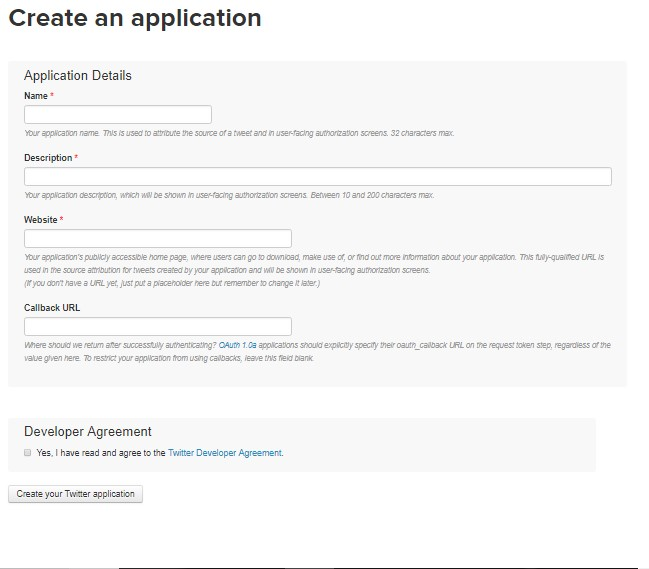

In [224]:
Image(filename="apps_twitter_pic1.jpg")

The "Name" field is the name of your app (i.e."My Sentiment Indicator"), the "Description" field is where you would write a brief description for your requests (i.e. app to trade sentiment of apple stock), and the "Website" field is the site that people would visit to download your app should it be public. You can use a default address such as https://www.google.com (be sure to use the format https://www.mysite.com because otherwise you'll get an error; will appear in red at top of screen) given that you aren't making the app public but simply getting data using the API.

After completing the form and creating your app, you should be taken to a screen that looks like the following:

### "insert apps_twitter_pic2.jpg here"

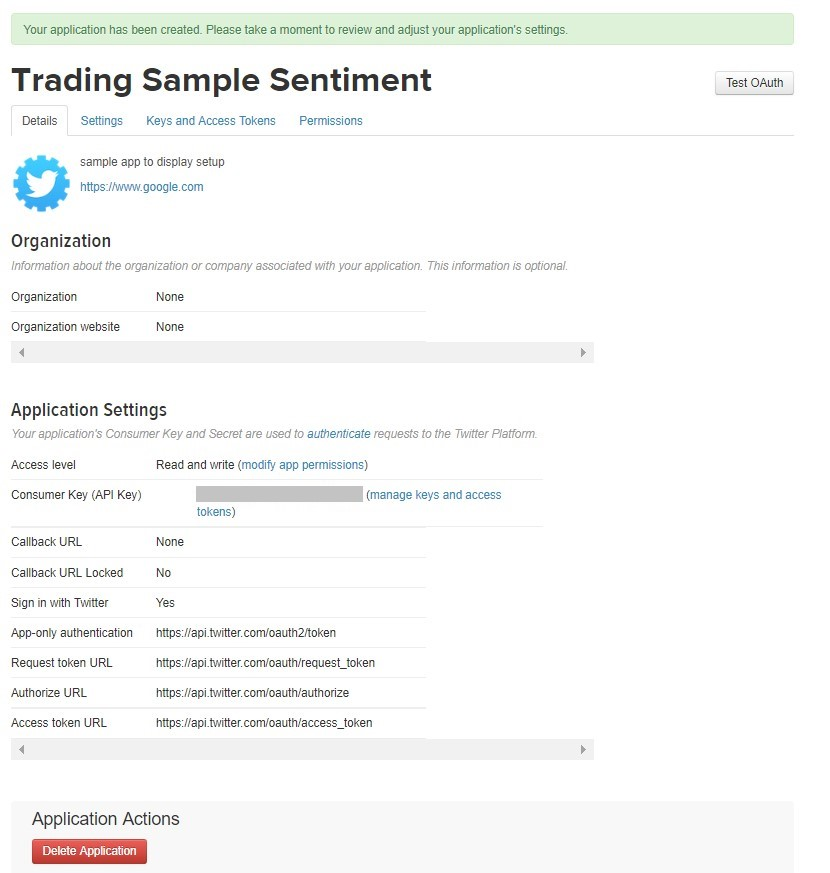

In [225]:
Image(filename="apps_twitter_pic2.jpg")

You then need to navigate to the tab "Keys and Access Tokens". What you will need from this page is your 1)Consumer Key(API Key), 2) Consumer Secret(API Secret), 3)Access Token and 4) Access Token Secret. When you arrive at this page, #1 and #2 will already be populated. To access #3 and #4 you will have to scroll down to the "Token Actions" section and click the button to create your access tokens. Below is a screenshot of of the page once you've clicked the button under "Token Actions".


### " insert apps_twitter_pic3.jpg here"


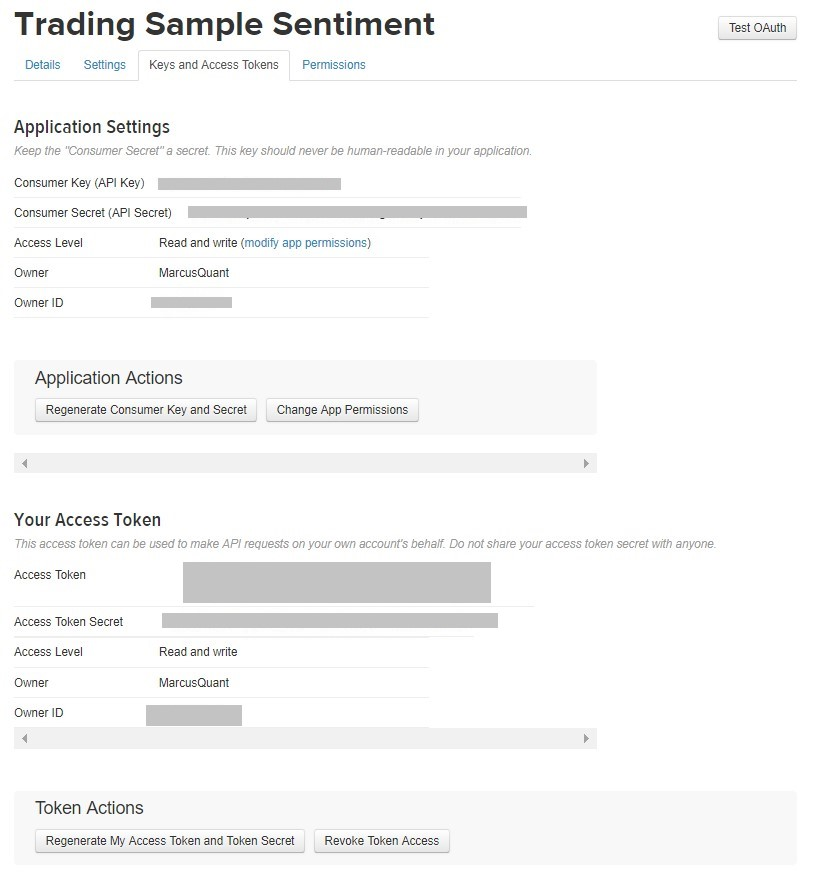

In [226]:
Image(filename="apps_twitter_pic3.jpg")

### Testing Our Twitter App Connection

We'll begin by importing a module that contains our access credentials.

In [4]:
from sentiment_app import *

Next we'll import the twitter package that will allow us to connect to the Twitter API. To learn more about the twitter package visit https://pypi.org/project/twitter/

In [5]:
from twitter import *


Now we can instantiate our twitter object.

In [6]:
#creating an instance of our twitter object and passing in our token, tokensecret, consumer key, and consumer secret 
#from our sentiment_app module.
app= Twitter( auth=OAuth(token,tsecret,ckey,csecret))

Now that we have our app instance, let's try searching for some tweets.

In [7]:
#searching for the latest tweets about the coronavirus
#and storing them in variables
corona_tweets=app.search.tweets(q='#coronavirus')
covid_tweets=app.search.tweets(q='#COVID')
covid19_tweets=app.search.tweets(q='#COVID19')

Now let's take a look at one of our corona virus tweets.

In [9]:
corona_tweets['statuses'][0]['text']

"RT @pauldashworth: CATASTROPHIC TORY FAILURE: Thanks to spectacular Tory failings, the Greeks marvel at Britain's #Covid19 chaos as their l…"

Now that we have our tweets, we can perform text analysis on them. Let's begin by creating a word cloud from the tweet we displayed above.

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


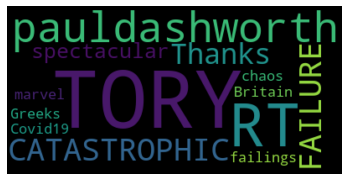

In [12]:
wordcloud = WordCloud().generate(corona_tweets['statuses'][0]['text'])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Our tweet object is a nested dictionary containing lists. To display the structure of our tweet objects, let's display the first tweet that uses the #COVID hastag.

In [13]:
covid_tweets['statuses'][0]

{'created_at': 'Sun May 10 20:26:39 +0000 2020',
 'id': 1259580633527001091,
 'id_str': '1259580633527001091',
 'text': 'RT @OfficialDGISPR: Major Muhammad Asghar laid his life in the line of duty at #Torkham border in fight against #COVID-19. Evacuated to CMH…',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'Torkham', 'indices': [79, 87]},
   {'text': 'COVID', 'indices': [112, 118]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'OfficialDGISPR',
    'name': 'DG ISPR',
    'id': 811505937911517184,
    'id_str': '811505937911517184',
    'indices': [3, 18]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1022083660907012096,
  'id_str': '10220836609070120

We can better understand our tweet object by calling the keys method on it.

In [16]:
covid_tweets.keys()



dict_keys(['statuses', 'search_metadata'])

We can now create a method that will allow us to get and store all of our corona virus tweets in a list.

In [17]:
tweets=[]
hastags=[corona_tweets,covid_tweets,covid19_tweets]
for tag in hastags:
    for count,value in enumerate(tag['statuses']):
        tweets.append(value['text'])
    

Now let's take a look at our list of corona tweets.

In [18]:
#printing out corona tweets
tweets

["RT @pauldashworth: CATASTROPHIC TORY FAILURE: Thanks to spectacular Tory failings, the Greeks marvel at Britain's #Covid19 chaos as their l…",
 "RT @Maryam_Rajavi_F: L'augmentation stupéfiante du nombre de décès dus au #coronavirus et la tendance à la hausse de la crise dans de nombr…",
 "RT @biobiobiobior: 🔺France 10 mai : Les Parisiens ont pris plus d'hydroxychloroquine que les Marseillais (LCI) .#chloroquine #France  #Véra…",
 'RT @CivicDuty2020: @quidpro53581632 @waltshaub Be sure to not underestimate Trump, Barr and the #CorruptGOP by assuming the November 3rd el…',
 'RT @DineshDSouza: The jejune phrase of the week is “follow the science.” This ignores the distinction between facts and values. Facts tell…',
 'RT @DawnNeesom: Stop being silly. Just keep a safe distance from everyone you don’t live with. It’s really not that complicated. 😔#lockdown…',
 'RT @jimallthetime: Whatever comes from tonight’s #coronavirus statement, we’ll be talking about it on @BBCShropshire tomorrow mor

Let's check the length of our tweets list.

In [19]:
len(tweets)

45

This makes sense because the standard Twitter API has a rate limit of 15 tweets and we used 3 hastags for our analysis.

Now let's ensure that all our tweets our distinct. We will use Numpy's unique method to create a list of distinct tweets.

In [20]:
unique_tweets=np.unique(tweets)

Let's now check the length of our unique tweets.

In [21]:
len(unique_tweets)

39

## Text Analysis

Now that we have a list of coronavirus tweets we can perform addtional text analysis on them. One thing that we might want to know is the average length of a typical corona virus tweet. Let's write a method now to determine the average length.

In [24]:
def tweet_avg_length(tweet_list):
    #initialize length variables
    tweet_length=0
    list_length=len(tweet_list)
    
    #iterate over list of tweets
    for count, tweet in enumerate(tweet_list):
        #get the length of each tweet
        current_length=len(tweet)
        #increment size of tweet length variable
        tweet_length+=current_length
        
    avg_length=round(tweet_length/list_length,0)
    
    return avg_length
    

Let's try out our method to compute the average length of our tweets.

In [25]:
avg_tweet_length=tweet_avg_length(unique_tweets)
print(avg_tweet_length)

134.0


So, the average length of our coronavirus tweets are 134 characters.

Word Clouds are visualizations that enable us to see the most important content in a document. Let's create a method that will allow us to see which words are most important from our sample of coronavirus tweets.

In [45]:
def create_wordcloud(unique_tweets):
    #initializing list to hold all tweets
    all_tweets=[]
    
    #iterating over list of unique tweets
    for count, tweet in enumerate(unique_tweets):
        #iterate over each word in tweet
        #for word in tweet:
        #append char/words to all tweets list
        all_tweets.append(tweet)
            #print(all_tweets)
    #create word cloud from all tweets list(i.e. list containing each individual word from all tweets)
    wordcloud = WordCloud().generate(tweet)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    return 
    

We're now ready to generate our word cloud.

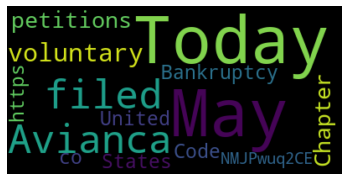

In [46]:
create_wordcloud(unique_tweets)

Let's take a moment and think about what we can infer from our word cloud. We can see that "Today" is the largest word displayed. We might infer a sense of urgency and or breaking news. We can all see that 'United' and 'States' is also displayed. This might be because, at the time of this analysis, the U.S. has the most coronavirus cases. Bankruptcy and Chapter also give us insight into the economic impact that the coronavirus has had.

How can we make this better? One way that we can improve this analysis is to use common natural language processing preprocessing steps. For example, we can see that https is a word listed in our word cloud. This is because our tweets contain links to external sites. However, for the sake of our analysis, this doesn't provide us with any useful information. It is common to remove links, emojis, stopwords etc. 

Let's clean up our tweet data and then recreate text analysis.

### Preprocessing our Tweet Data

#### Tokenization

Recall that tokenization is the process of taking a document and turning it into tokens (i.e. words). We will use NLTK to do this on our corona virus tweets. 

In [52]:
corona_words=nltk.word_tokenize(str(unique_tweets))

Let's take a look at our tokens.

In [53]:
corona_words

['[',
 "'",
 '@',
 'LBC',
 'Where',
 'we',
 'work',
 'the',
 'canteen',
 'has',
 '30',
 'tables',
 'with',
 '4',
 'chairs',
 'to',
 'each',
 'table',
 'and',
 '900',
 'workers',
 'with',
 '3',
 'staggered',
 'break',
 '’',
 's',
 'e…',
 'https',
 ':',
 "//t.co/EHGkKqYiow'",
 "'",
 '@',
 'fox32news',
 'This',
 '#',
 'Illinois',
 'governor',
 'and',
 'his',
 'allies',
 'have',
 'not',
 'let',
 'this',
 '#',
 'Covid',
 'crisis',
 'go',
 'to',
 'waste',
 ',',
 'as',
 'they',
 'maintain…',
 'https',
 ':',
 "//t.co/ggTdEC7pgo'",
 "'Being",
 'confused',
 'is',
 'how',
 'Britain',
 'will',
 'get',
 'through',
 'the',
 '#',
 'COVID-19',
 'Pandemic',
 '\\n\\n',
 '#',
 'coronavirus',
 '#',
 'beconfused',
 'https',
 ':',
 "//t.co/HyAoO6a1IY'",
 "'Fieldwork",
 'in',
 'the',
 'time',
 'of',
 '#',
 'COVID19',
 '-',
 'collaborate',
 'and',
 'hire',
 'local',
 'people',
 'https',
 ':',
 "//t.co/qPIAiBTMnf'",
 "'How",
 'are',
 'the',
 'children',
 'doing',
 'during',
 'the',
 '#',
 'COVID-19',
 'pandemi

Now that we have tokenized our tweets, let's recompute the average length of our corona virus tweets. We'll have to alter our method a bit to account for the fact that we have tokenized our tweets. We will set our list length variable to a default value representative of the number of tweets we had before tokenization.

In [55]:
def tokenized_tweet_avg_length(tweet_list,list_length):
    #initialize length variables
    tweet_length=0
    
    
    #iterate over list of tweets
    for count, tweet in enumerate(tweet_list):
        #get the length of each tweet
        current_length=len(tweet)
        #increment size of tweet length variable
        tweet_length+=current_length
        
    avg_length=round(tweet_length/list_length,0)
    
    return avg_length
    

In [56]:
tokenized_tweet_avg_length(corona_words,list_length=len(unique_tweets))

118.0

Prior to tokenizing our unique tweet our avg tweet length method returned a value of 134. Now, after tokenizing our tweet, we see that our updated method returns a value of 118.

There are some additional preprocessing steps that we can perform that will further impact our text analysis.

#### Normalization


The normalization step consists of various techniques such as stemming, lemmatization, removing punctation, removing contractions, removing stopwords, etc. We'll now perform some of these methods on our coronavirus tweets.

First I'll illustrate how you can use nltk to download stopwords. You'll begin by keying nltk.download(). This should return an interactive shell. You will then  navigate to the tab "All Packages" and scroll down to "stopwords". Highlight this option and click download.

Alternatively you could key the following and select 'd' for Download and then enter 'stopwords'. Selecting 'l' for list will return all of the available packages.



In [61]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\e0184385\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


After you have downloaded stopwords from nltk, you can store them in a variable. We'll do that now.

In [62]:

stopwords=nltk.corpus.stopwords.words('english')

Let's take a look at our stopwords.

In [63]:
#printing out our stopwords
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Creating a Method to Remove Stopwords.


Now that we have a list of stop words, we can use the same to remove them from our coronavirus tweets. What we'd like to do is to iterate over our COVID19 tweets and check to see if a word is in our list of stopwords. If the word is not in our list of stopwords, we will store it in a new variable to hold only those words not included in our list of stopwods.

In [64]:
def remove_stopwords(tweets,stopwords):
    #PARAMETERS#
    ############
    #tweets- a list of tweets
    #stopwords - a list of stopwords
    
    #creating a list to hold words not in list of stopwords
    no_stopwords=[]
    
    #iterating over statuses
    for count,word in enumerate(tweets):
        if word not in stopwords:
            no_stopwords.append(word)
    
    return no_stopwords

Okay now that we have a function to remove our stopwords, we'll initialize a variable to hold our function so that when our function returns no_stopwords, they will be stored in that variable.

In [65]:
#creating variable to hold the words returned by our remove
#stopwords function; 
coronavirus_no_stopwords=remove_stopwords(corona_words,stopwords)

Now let's take a look at our coronavirus words excluding stopwords.

In [66]:
#printing new list of fb words
coronavirus_no_stopwords

['[',
 "'",
 '@',
 'LBC',
 'Where',
 'work',
 'canteen',
 '30',
 'tables',
 '4',
 'chairs',
 'table',
 '900',
 'workers',
 '3',
 'staggered',
 'break',
 '’',
 'e…',
 'https',
 ':',
 "//t.co/EHGkKqYiow'",
 "'",
 '@',
 'fox32news',
 'This',
 '#',
 'Illinois',
 'governor',
 'allies',
 'let',
 '#',
 'Covid',
 'crisis',
 'go',
 'waste',
 ',',
 'maintain…',
 'https',
 ':',
 "//t.co/ggTdEC7pgo'",
 "'Being",
 'confused',
 'Britain',
 'get',
 '#',
 'COVID-19',
 'Pandemic',
 '\\n\\n',
 '#',
 'coronavirus',
 '#',
 'beconfused',
 'https',
 ':',
 "//t.co/HyAoO6a1IY'",
 "'Fieldwork",
 'time',
 '#',
 'COVID19',
 '-',
 'collaborate',
 'hire',
 'local',
 'people',
 'https',
 ':',
 "//t.co/qPIAiBTMnf'",
 "'How",
 'children',
 '#',
 'COVID-19',
 'pandemic',
 '?',
 'Are',
 'safe',
 '?',
 '\\n\\nJoin',
 'Monday',
 '#',
 'sayftychat',
 'w/',
 'guest…',
 'https',
 ':',
 "//t.co/Q5DCLaz2sw'",
 "'In",
 '#',
 'Germania',
 ',',
 'con',
 'la',
 '#',
 'Fase2',
 'iniziata',
 'già',
 'da',
 'due',
 'settimane',
 ','

We have now removed stopwords from our list of statuses but now we can see that we have a lot of tokens that are merely punctuation. We'll now create a method that will remove these entries.

### Creating a Method to Remove Punctuation


The logic behind this method will be similar to that of our stopwords method. We will iterate over our coronavirus_no_stopwords list and store only the values that aren't punctuation into a new list.

We'll begin by importing a the regular expressions Python package. To learn more about using the regular expressions package you can visit the following links: https://docs.python.org/3/library/re.html and or https://docs.python.org/3/howto/regex.html#regex-howto

In [67]:
import re

In [68]:
def remove_punct(tweets):
    #creating list to hold values that aren't punctuation
    no_punct=[]
    
    #iterating over list of no_stopwords
    for word in tweets:
        new_word=re.sub("[-\n~~$,@/#':\//-?....]",'',word)
        if new_word !='':
            no_punct.append(new_word)
            
    return no_punct
  

Now that we have our method to remove punctuation, we can create a variable to hold our updated list of words.

In [69]:
#passing in our updated list of coronavirus tokens that do not contain stopwords
#into our function to remove punctuation and storing results in variable
coronavirus_no_punct= remove_punct(coronavirus_no_stopwords)

 We created a method to manually remove punctuation from our tokens using Regular Expressions. To survey the magnitude of these additional preprocessing steps, we can check the length of our tokens list before the removal of stopwords and punctuation(i.e. after tokenization) and compare the same to the length of our list of tokens following our additional preprocessing steps.

Checking length of tokens list prior to removal of punctuation.

In [71]:
len(corona_words)

1022

Checking the length of tokens list following removal of stopwords and punctuation.

In [72]:
len(coronavirus_no_punct)

621

In [80]:
type(coronavirus_no_punct)

list

Now that we have preprocessed our coronavirus tweets, let's calculate the average length of our tweets.

In [87]:
tweet_avg_length(coronavirus_no_punct)

6.0

Let's do a brief review. We started by creating our app on Twitter and getting our keys and tokens. We then stored those keys and tokens in a python file named sentiment_app.py. After importing the twitter package, we were then able to create an app instance, by passing in our keys and tokens from our sentiment_app file.

With an instance of our app created, we could now call methods off of our app object. We called the search method and passed in '#coronavirus','#COVID19',and 'corona' to search for tweets about COVID19. We stored this search in a variable which would allow us to manipulate the tweets. The search method returns a dictionary. In order to better understand how to access the tweets for corona virus, we called the keys() method on our dictionary object. We then learned that the dictionary was partitioned into two keys 1) meta data and 2) statuses. The statuses key holds the tweets we needed, thus we then created a tweets list and method to store only the text data. We used 'text' to parse out the tweets as a result of looking through the nested dictionary.

Okay. Now that we have a better understanding of how to get tweet data from Twitter, we can begin constructing a means to get the ticker symbol of every stock in the S&P 500. Recall that we will need these ticker symbols so that we can choose a stock at random to compare it's price change relative to coronavirus tweets on a particular day.

## Creating a Web Scraper to Get Ticker Symbols

In order to get tweets related to every stock in the S&P 500, we will need a list of all of the ticker symbols. Sure, you could create this in an archaic way and manually input all of the ticker symbols but I can't imagine a reason why you would want to do that. We'll leverage the power of programming in Python to build a web scraper that will allow us to scrape the symbols and create a list.

To create our web scraper we'll need BeautifulSoup, requests and pandas. Since we've already imported bs4 and pandas, let's now import requests.

In [104]:
import requests

We are going to scrape the Wikipedia page that lists each stock in the S&P 500. We will then pass this data into a pandas dataframe that will allow us to perform further operations.

We'll begin by storing the url for the Wikipedia page in a variable.

In [105]:
url='https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

We can now use the requests package to grab the information from the Wikipedia page. Note, this isn't going to immediately return the table. We will have to use our knowledge of HTML to properly identify the area on the page that we want to retrieve. To do this we can simply inspect the item by right clicking it. 

### "Insert file scraping_stocks_inspecting_item here"

We can see by navigating through the Elements that our data is in an HTML table tag within a div tag. We can use this information to get our data.

### "Insert file scraping_stocks_inspecting_item here"

Now that we are aware of where our data is located on the page, we can use our requests package to create a variable that will hold the page information from our url. We, after getting the content from the url, can create a BeautifulSoup instance to grab our data.

In [106]:
#creating variable to get and hold url data
page_info=requests.get(url)
content=page_info.content

I'll briefly display why we need BeautifulSoup. Let's call on content variable to see what it returns.

In [107]:
#calling content variable to display what we've retrieved thus far
content

b'\n<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of S&amp;P 500 companies - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XrlpTgpAMNIAA0UBmUEAAAAA","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_S\\u0026P_500_companies","wgTitle":"List of S\\u0026P 500 companies","wgCurRevisionId":956054167,"wgRevisionId":956054167,"wgArticleId":2676045,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","All articles with dead external links","Articles with dead external links from Novem

So we can see, simply calling content returns the entire HTML file.

Now let's use BeautifulSoup to grab the data that we need. We'll begin by creating a BeautifulSoup object by passing in our content variable. We can then use this object to find the table on the Wikipedia page.

In [108]:
#creating BeautifulSoup object
page=BeautifulSoup(content, 'lxml') #note, by passing in lxml we are specifying the parser

In [109]:
#creating variable to narrow results
narrower=page.find('div',{'class':'mw-content-ltr','id':'mw-content-text'}) 
#creating a variable to grab content from the narrowed results
data_table=narrower.find_all('table')

Let's take a brief pause to ensure that we understand what's happening here. We imported requests and BeautifulSoup so that we could scrape the table from the Wikipedia page containing all of the stock symbols in the S&P 500(note we had already imported BeautifulSoup earlier, so in the recent code we only needed to import requests).

We created an object to hold the Wikipedia page url and HTML content from the page. We used requests to store the page data into a variable. We could then create a BeautifulSoup object by passing in our content variable. Recall that our content variable held all of the HTML from the webpage. 

The next step may be where you may have gotten a little lost. We created the narrower variable so that we could go to a specific place on the webpage. We passed in the div tag and class and id information to specify where on the page we wanted to go. These elements were identified by right clicking on the table on the Wikipedia page and selecting inspect. We were then able to navigate through the elements and find what div the table was in as well as find the class and id associated with that div. I won't get into the depths of HTML but in short the id and class tag allows front end developers the ability to specify what elements they want to style using CSS. Classes are broader in scope, think in terms of global variables, and id tags have a greater level of specificity, think in terms of local variables. These allowed us to identify the precise information that we wanted to scrape.

Now we can take a look at our data_table variable.

In [110]:
data_table

[<table class="wikitable sortable" id="constituents">
 <tbody><tr>
 <th><a href="/wiki/Ticker_symbol" title="Ticker symbol">Symbol</a>
 </th>
 <th>Security</th>
 <th><a href="/wiki/SEC_filing" title="SEC filing">SEC filings</a></th>
 <th><a href="/wiki/Global_Industry_Classification_Standard" title="Global Industry Classification Standard">GICS</a> Sector</th>
 <th>GICS Sub Industry</th>
 <th>Headquarters Location</th>
 <th>Date first added</th>
 <th><a href="/wiki/Central_Index_Key" title="Central Index Key">CIK</a></th>
 <th>Founded
 </th></tr>
 <tr>
 <td><a class="external text" href="https://www.nyse.com/quote/XNYS:MMM" rel="nofollow">MMM</a>
 </td>
 <td><a href="/wiki/3M" title="3M">3M Company</a></td>
 <td><a class="external text" href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=MMM&amp;action=getcompany" rel="nofollow">reports</a></td>
 <td>Industrials</td>
 <td>Industrial Conglomerates</td>
 <td><a class="mw-redirect" href="/wiki/St._Paul,_Minnesota" title="St. Paul, Minnesot

Okay, looking at the HTML in our data table we can see that the Ticker Symbols are inside 'a' tags within 'td' tags. What this does is allow the Ticker Symbols, when clicked on, to take the user to the quote on the NYSE's website. In other words, our ticker symbols are hyperlinks to the quotes for our symbols.

Another thing that we notice is that each of our symbols have the class "external text" within the 'a' tags. We wouldn't want to simply grab the 'td' tags because this would return a lot more information than what we're interested in. So let's write some method to grab the 'a' tags that contain the class "external text" and store these in a separate variable.

We could grab all of the 'a' tags in the document by doing the following.

In [111]:
a_tags=data_table[0].findAll('a')


Now let's take a look at our a_tags object.

In [112]:
a_tags

[<a href="/wiki/Ticker_symbol" title="Ticker symbol">Symbol</a>,
 <a href="/wiki/SEC_filing" title="SEC filing">SEC filings</a>,
 <a href="/wiki/Global_Industry_Classification_Standard" title="Global Industry Classification Standard">GICS</a>,
 <a href="/wiki/Central_Index_Key" title="Central Index Key">CIK</a>,
 <a class="external text" href="https://www.nyse.com/quote/XNYS:MMM" rel="nofollow">MMM</a>,
 <a href="/wiki/3M" title="3M">3M Company</a>,
 <a class="external text" href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=MMM&amp;action=getcompany" rel="nofollow">reports</a>,
 <a class="mw-redirect" href="/wiki/St._Paul,_Minnesota" title="St. Paul, Minnesota">St. Paul, Minnesota</a>,
 <a class="external text" href="https://www.nyse.com/quote/XNYS:ABT" rel="nofollow">ABT</a>,
 <a href="/wiki/Abbott_Laboratories" title="Abbott Laboratories">Abbott Laboratories</a>,
 <a class="external text" href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=ABT&amp;action=getcompany" rel="nofollow">re

To get only the 'a' tags with a class of 'external text' we'll do the following:

In [113]:
external_text=page.findAll('a',{'class':'external text'})

Let's now print out our 'a' tags containing our ticker symbols.

In [114]:
external_text

[<a class="external text" href="https://www.nyse.com/quote/XNYS:MMM" rel="nofollow">MMM</a>,
 <a class="external text" href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=MMM&amp;action=getcompany" rel="nofollow">reports</a>,
 <a class="external text" href="https://www.nyse.com/quote/XNYS:ABT" rel="nofollow">ABT</a>,
 <a class="external text" href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=ABT&amp;action=getcompany" rel="nofollow">reports</a>,
 <a class="external text" href="https://www.nyse.com/quote/XNYS:ABBV" rel="nofollow">ABBV</a>,
 <a class="external text" href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=ABBV&amp;action=getcompany" rel="nofollow">reports</a>,
 <a class="external text" href="http://www.nasdaq.com/symbol/abmd" rel="nofollow">ABMD</a>,
 <a class="external text" href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=ABMD&amp;action=getcompany" rel="nofollow">reports</a>,
 <a class="external text" href="https://www.nyse.com/quote/XNYS:ACN" rel="nofollow">ACN</a>,
 <a 

We're getting closer to our goal of parsing out the ticker symbols from our HTML document. We've just created a variable to hold the anchor tags that contain the class 'external text'. Looking at our list of 'a' tags we can see that we 1) still have the entire hyperlink and other HTML code and 2) everything is stored in a single list. 

We need a way to separate our results so that each symbol's hyperlink will have its own index and we can then begin operating on each individual symbol. We'll create a method to split the values in the list into lists of their own, thus creating a nested list of the hyperlinks of our symbols.

In [115]:
tickers=[]
for count,value in enumerate(external_text):
    symbol=str(value)
    split=symbol.split(" ")
    tickers.append(split)

Now let's take a look at our tickers list.

In [116]:
tickers

[['<a',
  'class="external',
  'text"',
  'href="https://www.nyse.com/quote/XNYS:MMM"',
  'rel="nofollow">MMM</a>'],
 ['<a',
  'class="external',
  'text"',
  'href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=MMM&amp;action=getcompany"',
  'rel="nofollow">reports</a>'],
 ['<a',
  'class="external',
  'text"',
  'href="https://www.nyse.com/quote/XNYS:ABT"',
  'rel="nofollow">ABT</a>'],
 ['<a',
  'class="external',
  'text"',
  'href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=ABT&amp;action=getcompany"',
  'rel="nofollow">reports</a>'],
 ['<a',
  'class="external',
  'text"',
  'href="https://www.nyse.com/quote/XNYS:ABBV"',
  'rel="nofollow">ABBV</a>'],
 ['<a',
  'class="external',
  'text"',
  'href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=ABBV&amp;action=getcompany"',
  'rel="nofollow">reports</a>'],
 ['<a',
  'class="external',
  'text"',
  'href="http://www.nasdaq.com/symbol/abmd"',
  'rel="nofollow">ABMD</a>'],
 ['<a',
  'class="external',
  'text"',
  'href="https://www.s

We now have our list of lists of stock symbol hyperlinks. We can now create a method that will allow us to parse out the symbols from within the 'a' tags so that we can store them in a list of their own.

In [117]:
#creating variable to hold symbols
stock_tickers=[]
#iterating over tickers list
for count,value in enumerate(tickers):
    #creating variable to hold length of tickers
    length=len(str(value[-1]))
    
    #writing conditional that avoids a tags with
    #a class of external text that doesnt contain symbols
    if count%2==0:
        #using length of list to determine how to parse
        #ticker symbols of different lengths
        if length == 20: #symbols with 1 letter
            symbol=tickers[count][-1][-5:-4].splitlines(tickers.count('>'))
        elif length == 21: #symbols with 2 letters
            symbol=tickers[count][-1][-6:-4].splitlines(tickers.count('>'))
        elif length==22: #symbols with 3 letters
            symbol=tickers[count][-1][-7:-4].splitlines(tickers.count('>'))
        elif length==23: #symbols with 4 letters
            symbol=tickers[count][-1][-8:-4].splitlines(tickers.count('>'))
        elif length==24: #symbols with 5 letters
            symbol=tickers[count][-1][-9:-4].splitlines(tickers.count('>'))   
            
    #adding the symbols to our list of stock_tickers    
    stock_tickers.append(symbol)

Let's take a look at our list of lists of stock symbols.

In [118]:
stock_tickers

[['MMM'],
 ['MMM'],
 ['ABT'],
 ['ABT'],
 ['ABBV'],
 ['ABBV'],
 ['ABMD'],
 ['ABMD'],
 ['ACN'],
 ['ACN'],
 ['ATVI'],
 ['ATVI'],
 ['ADBE'],
 ['ADBE'],
 ['AMD'],
 ['AMD'],
 ['AAP'],
 ['AAP'],
 ['AES'],
 ['AES'],
 ['AFL'],
 ['AFL'],
 ['A'],
 ['A'],
 ['APD'],
 ['APD'],
 ['AKAM'],
 ['AKAM'],
 ['ALK'],
 ['ALK'],
 ['ALB'],
 ['ALB'],
 ['ARE'],
 ['ARE'],
 ['ALXN'],
 ['ALXN'],
 ['ALGN'],
 ['ALGN'],
 ['ALLE'],
 ['ALLE'],
 ['AGN'],
 ['AGN'],
 ['ADS'],
 ['ADS'],
 ['LNT'],
 ['LNT'],
 ['ALL'],
 ['ALL'],
 ['GOOGL'],
 ['GOOGL'],
 ['GOOG'],
 ['GOOG'],
 ['MO'],
 ['MO'],
 ['AMZN'],
 ['AMZN'],
 ['AMCR'],
 ['AMCR'],
 ['AEE'],
 ['AEE'],
 ['AAL'],
 ['AAL'],
 ['AEP'],
 ['AEP'],
 ['AXP'],
 ['AXP'],
 ['AIG'],
 ['AIG'],
 ['AMT'],
 ['AMT'],
 ['AWK'],
 ['AWK'],
 ['AMP'],
 ['AMP'],
 ['ABC'],
 ['ABC'],
 ['AME'],
 ['AME'],
 ['AMGN'],
 ['AMGN'],
 ['APH'],
 ['APH'],
 ['ADI'],
 ['ADI'],
 ['ANSS'],
 ['ANSS'],
 ['ANTM'],
 ['ANTM'],
 ['AON'],
 ['AON'],
 ['AOS'],
 ['AOS'],
 ['APA'],
 ['APA'],
 ['AIV'],
 ['AIV'],
 ['AAPL'],
 ['

One of the first things that we notice is that some of our symbols are repeated. We can fix this by creating a variable that holds only the unique symbols.

In [119]:
unique_tickers=np.unique(stock_tickers)

Let's check our list of unique stock symbols.

In [120]:
unique_tickers

array(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN',
       'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES',
       'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN',
       'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN',
       'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA',
       'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN',
       'BF.B', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR',
       'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT',
       'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN',
       'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX',
       'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF',
       'COG', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CPRI', 'CPRT', 'CRM',
       'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTVA', 'CTXS', 'CV

To ensure that we've properly scraped all of the stocks in the S&P 500 we can check the length of our unique_tickers variable.

In [121]:
len(unique_tickers)

505

### Alternative Way to Scrape Stock Symbols

The illustration I've outlined above is a bit involved. If you've ever attempted to scrape ticker symbols and had to parse the symbols out of hyperlinks with no prior knowledge then you're aware that it's not as easy as it looks above. You also might not be familiar with HTML, of which is good to know when using BeautifulSoup. 

In lieu of this, I'll demonstrate a much quicker alternative to getting the ticker symbols we need that doesn't require you to know HTML. It is however, if you plan on doing web scraping, data science, NLP, etc., a good idea to play around with BeautifulSoup and become familiar with HTML as doing so will provide you with more options to retrieve data.

Okay, for our alternative web scraping implementation we're simply going to go to the provided url and copy the entire table. So, click and drag across the entire table. Next, right click and then select copy.

Next, we will initialize a variable to hold the data that we've just copied from the Wikipedia page of our stock symbols. We will then use pandas to read the data from our clipboard and store it in our variable.

In [384]:
sample=pd.read_clipboard()

Okay. Now let's check what our sample variable returns.

In [385]:
sample

,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,0001090872
0,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201.0
1,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449.0
2,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193.0
3,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152.0
4,ABC,AmerisourceBergen Corp,reports,Health Care,Health Care Distributors,"Chesterbrook, Pennsylvania",2001-08-30,1140859.0
5,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800.0
6,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373.0
7,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343.0
8,ADI,"Analog Devices, Inc.",reports,Information Technology,Semiconductors,"Norwood, Massachusetts",1999-10-12,6281.0
9,ADM,Archer-Daniels-Midland Co,reports,Consumer Staples,Agricultural Products,"Decatur, Illinois",1981-07-29,7084.0


We now have a dataframe of the table from the Wikipedia page. One minor issue is that the first row of our data is being used as our column names. We can fix this by creating a new dataframe with dummy column names using the values from our clipboard.

In [395]:
df=pd.DataFrame(sample, columns=['1','2','3','4','5','6','7','8'])

We added a number to represent the columns. Let's check what our updated dataframe looks like.

In [387]:
#printing our df
df

,1,2,3,4,5,6,7,8
0,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
1,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1.15845e+06
2,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193
3,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1.55115e+06
4,ABC,AmerisourceBergen Corp,reports,Health Care,Health Care Distributors,"Chesterbrook, Pennsylvania",2001-08-30,1.14086e+06
5,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
6,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1.46737e+06
7,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343
8,ADI,"Analog Devices, Inc.",reports,Information Technology,Semiconductors,"Norwood, Massachusetts",1999-10-12,6281
9,ADM,Archer-Daniels-Midland Co,reports,Consumer Staples,Agricultural Products,"Decatur, Illinois",1981-07-29,7084


We can now slice out the '1' column that contains our stock symbols.

In [388]:
stock_tickers=df['1']

Let's check the head our list of stock symbols.

In [390]:
stock_tickers.head()

0     AAL
1     AAP
2    AAPL
3    ABBV
4     ABC
Name: 1, dtype: object

To ensure that we didn't miss any data we'll check the length of our stock_tickers. Recall that there are 505 stocks in the S&P 500.


In [391]:
#checking length of stock_tickers variable
len(stock_tickers)

505

## Analyzing COVID19 Impact

Okay. At this point in our analysis we've gathered COVID19 tweets using the Twitter API. We've performed text analysis on our tweet data and saw the impact that fundamental preprocessing techniques can have on our text analysis. We have also built a custom webscraper to retrieve each ticker symbol in the S&P 500.

Now that we have every ticker symbol in the S&P 500 we need a mechanism to collect the end of day stock prices. Recall, our goal is to show the impact that news concerning the coronavirus is having on any particular stock. To achieve this we will create a method to retrieve a stock's trading history prior to the outbreak spreading to the US. We will also develop a means of collecting a random stock's trading activity on a day selected by randomly selecting a coronavirus tweet from our dataset.

To begin, let's create a method to retrieve stock prices prior to the spread of COVID19 in the US. We will use the November 2019 period as our timeframe to establish pre-coronavirus trading activty (i.e. according to reports, the outbreak began in December 2019 in China; thus this timeframe should be a safe period of creating our benchmark)

In [101]:
#importing pandas_data reader to retrieve stock prices
from pandas_datareader import data

In [129]:
def get_benchmark_activity(symbols_list):
    
    #setting benchmark period
    start_date='2019-11-01'
    end_date='2019-11-30'
    
    #randomly select ticker symbol
    randTicker=np.random.choice(unique_tickers)
    
    stock_data=data.DataReader(randTicker,'yahoo',start_date,end_date)
    
    return stock_data
    

There's some additional functionality that we would like to add to our benchmark method, but before we do, let's check that we can properly retrieve data for our stock. We'll return our stock data for now to test our method.

In [130]:
test=get_benchmark_activity(unique_tickers)

In [131]:
test


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,136.339996,133.610001,134.610001,133.649994,1483900.0,132.818008
2019-11-04,136.339996,133.229996,133.850006,136.220001,2345100.0,135.372009
2019-11-05,137.940002,134.309998,136.669998,134.339996,1194500.0,133.503708
2019-11-06,135.229996,133.410004,134.820007,134.869995,1016900.0,134.030411
2019-11-07,137.000000,135.580002,135.850006,136.210007,1840100.0,135.362076
2019-11-08,137.729996,135.750000,136.000000,136.839996,879600.0,135.988144
2019-11-11,136.240005,134.539993,135.759995,135.330002,886700.0,134.487549
2019-11-12,136.210007,134.630005,135.539993,135.139999,962400.0,134.298721
2019-11-13,135.259995,133.869995,134.229996,134.389999,1033400.0,133.553391


Okay. We can see that we are now able to randomly choose a stock from our ticker list and get it's trading activity over our benchmark period. Now, we'll complete our benchmark method by adding in functionality that will allow us to display the trading activity as well as display the two day moving average. We would like to display the two day moving average because it will be useful in providing a comparison for how a stock typically would change day over day prior to the coronavirus and how a coronavirus tweet on any given day could cause the stock to change day over day.

In [150]:
from datetime import datetime as dt


In [134]:
def get_benchmark_activity(symbols_list):
    
    #setting benchmark period
    start_date='2019-11-01'
    end_date='2019-11-30'
    
    #randomly select ticker symbol
    randTicker=np.random.choice(unique_tickers)
    
    stock_data=data.DataReader(randTicker,'yahoo',start_date,end_date)
    
    #creating 2 day moving average
    ma=stock_data['Close'].rolling(window=2).mean()
    
    #creating plot
    fig, ax = plt.subplots(figsize=(16,9))

    ax.plot(stock_data.index, stock_data['Close'], label=randTicker)
    ax.plot(ma.index, ma, label='2 Day Moving Average')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted closing price ($)')
    plt.title(f'{randTicker} Benchmark Trading Activity')
    ax.legend()
    
    return 
    

Now that we've updated our benchmark method, let's test it out.

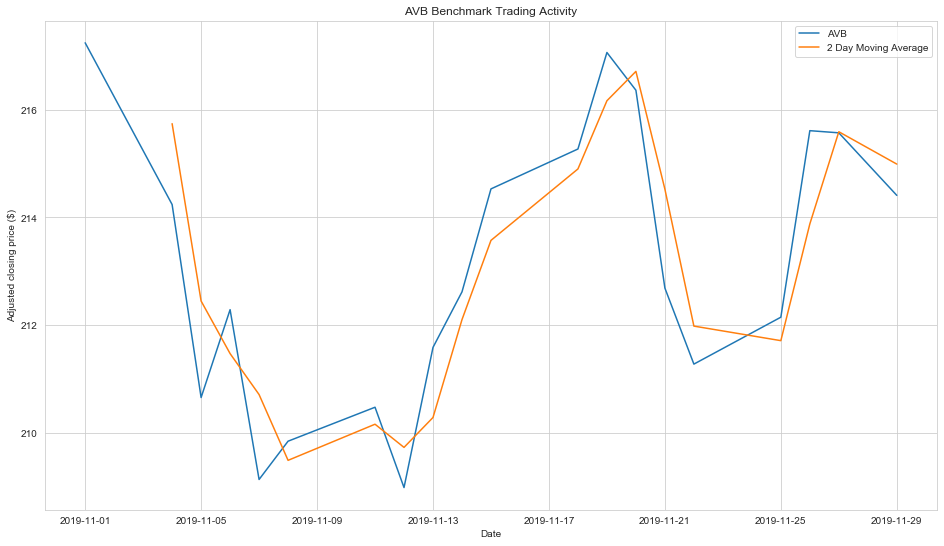

In [135]:
get_benchmark_activity(unique_tickers)

Great! To recap, we created a method that randomly selects stocks from our list of S&P 500 ticker symbols, retrieves the stock's trading activity over our benchmark period, and then displays that particular stock's trading activity and two day moving average.

Now, let's create a method that will randomly select a tweet from our list of coronavirus tweets, grab the date in which the tweet was created, and gather a random stock's trading activity for that date.

In [203]:
def get_rand_tweet(unique_tickers,corona_tweets,covid_tweets,covid19_tweets):
    
    #list to hold all tweet tags objects
    tweet_list=[]
    tweet_list.append(corona_tweets)
    tweet_list.append(covid_tweets)
    tweet_list.append(covid19_tweets)
    
    #randomly select specific hashtag from tweet list
    randTag=np.random.choice(tweet_list)
    
    #random select tweet and date from randTag tweet object
    randTweet=np.random.choice(randTag['statuses'])
    tweet_text=randTweet['text']
    tweet_date=randTweet['created_at']

    #reformat tweet date
    clean_tweet_date=pd.to_datetime(tweet_date)
    #print(clean_tweet_date)
    
    #randomly select stock symbol
    randStock=np.random.choice(unique_tickers)
        
    #checking to see of tweet made over the weekend outside of market hours
    post_day=tweet_date[0:3]
    
    if post_day=='Sat':
        new_day=clean_tweet_date.day+2
        start_date=str(clean_tweet_date.year)+'-'+'0'+str(clean_tweet_date.month)+'-'+str(new_day)
        end_date=start_date
        stock_data=data.DataReader(randStock,'yahoo',start_date,end_date)
        
    elif post_day=='Sun':
        new_day=clean_tweet_date.day+1
        start_date=str(clean_tweet_date.year)+'-'+'0'+str(clean_tweet_date.month)+'-'+str(new_day)
        end_date=start_date
        stock_data=data.DataReader(randStock,'yahoo',start_date,end_date)
        
    else:
    
        #get randStock data
        start_date=str(clean_tweet_date.year)+'-'+'0'+str(clean_tweet_date.month)+'-'+str(clean_tweet_date.day)
        end_date=start_date        
        stock_data=data.DataReader(randStock,'yahoo',start_date,end_date)
    
    
    #get stock price acvitity
    stock_activity=[]
    stock_activity.append(stock_data['Open'])
    stock_activity.append(stock_data['High'])
    stock_activity.append(stock_data['Low'])
    stock_activity.append(stock_data['Close'])
    
    #plot
    plt.figure(figsize=(10,6))
    plt.plot(stock_activity)
    plt.title(f'{randStock}"s Reaction to {tweet_text} on {tweet_date}')
    plt.tight_layout()
    plt.show()
    
    return 

2020-05-10 20:26:36+00:00


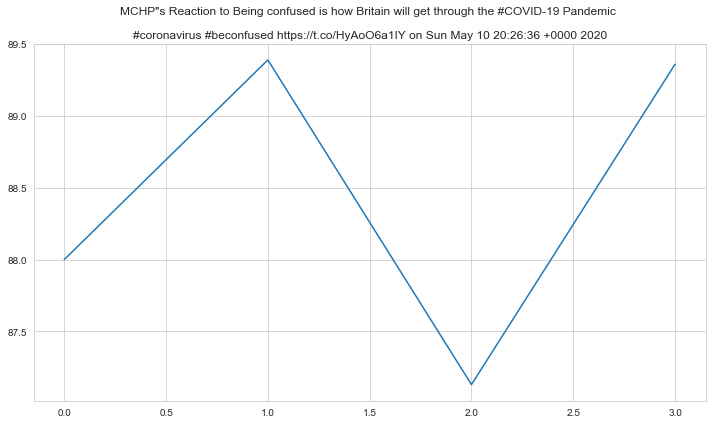

In [205]:
get_rand_tweet(unique_tickers,corona_tweets,covid_tweets,covid19_tweets)

Great! Above we have plotted the random stock's Open,High,Low,and Closing Prices in that order. We began with the Open so that it could be used as a proxy for the prior day's Closing Price. We plotted the High and Low to show how the stock moved within the trading session following the coronavirus tweet. We also plotted the Close to show how the stock finished the trading session following the tweet.

To complete our analysis, let's create a composite plot by combining our benchmark with our reaction plot.

In [220]:
def composite_analysis(unique_tickers,corona_tweets,covid_tweets,covid19_tweets):
    
    #creating benchmark
    #setting benchmark period
    start_date='2019-11-01'
    end_date='2019-11-30'
    
    #randomly select ticker symbol
    randTicker=np.random.choice(unique_tickers)
    
    stock_data=data.DataReader(randTicker,'yahoo',start_date,end_date)
    
    #creating 2 day moving average
    ma=stock_data['Close'].rolling(window=2).mean()
    
        
    #creating reaction analysis
    #list to hold all tweet tags objects
    tweet_list=[]
    tweet_list.append(corona_tweets)
    tweet_list.append(covid_tweets)
    tweet_list.append(covid19_tweets)
    
    #randomly select specific hashtag from tweet list
    randTag=np.random.choice(tweet_list)
    
    #random select tweet and date from randTag tweet object
    randTweet=np.random.choice(randTag['statuses'])
    tweet_text=randTweet['text']
    tweet_date=randTweet['created_at']

    #reformat tweet date
    clean_tweet_date=pd.to_datetime(tweet_date)
    
    
            
    #checking to see of tweet made over the weekend outside of market hours
    post_day=tweet_date[0:3]
    
    if post_day=='Sat':
        new_day=clean_tweet_date.day+2
        reaction_start_date=str(clean_tweet_date.year)+'-'+'0'+str(clean_tweet_date.month)+'-'+str(new_day)
        reaction_end_date=reaction_start_date
        reaction_stock_data=data.DataReader(randTicker,'yahoo',reaction_start_date,reaction_end_date)
        
    elif post_day=='Sun':
        new_day=clean_tweet_date.day+1
        reaction_start_date=str(clean_tweet_date.year)+'-'+'0'+str(clean_tweet_date.month)+'-'+str(new_day)
        reaction_end_date=reaction_start_date
        reaction_stock_data=data.DataReader(randTicker,'yahoo',reaction_start_date,reaction_end_date)
        
    else:
    
        #get randStock data
        reaction_start_date=str(clean_tweet_date.year)+'-'+'0'+str(clean_tweet_date.month)+'-'+str(clean_tweet_date.day)
        reaction_end_date=reaction_start_date        
        reaction_stock_data=data.DataReader(randTicker,'yahoo',reaction_start_date,reaction_end_date)
    
    
    #get stock price acvitity
    stock_activity=[]
    stock_activity.append(reaction_stock_data['Open'])
    stock_activity.append(reaction_stock_data['High'])
    stock_activity.append(reaction_stock_data['Low'])
    stock_activity.append(reaction_stock_data['Close'])
    
    
    
    #creating plot
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,9))

    ax1.plot(stock_data.index, stock_data['Close'], label=randTicker+''+' Benchmark Trading Activity')
    ax1.plot(ma.index, ma, label='2 Day Moving Average')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adjusted closing price ($)')
    ax1.legend()
    
    ax2.plot(stock_activity,label=f'{randTicker} COVID19 Tweet Reaction')
    ax2.legend()
    
    plt.show()
    
    return

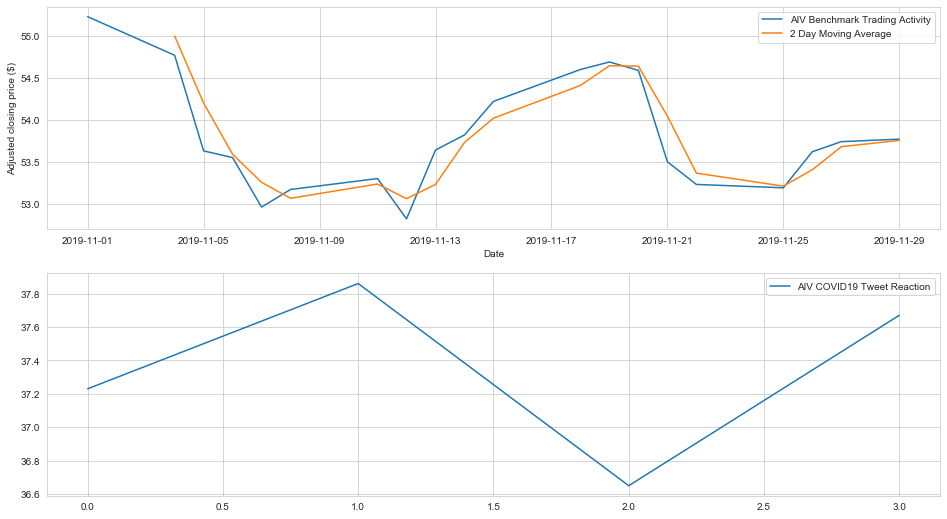

In [221]:
composite_analysis(unique_tickers,corona_tweets,covid_tweets,covid19_tweets)

Above we can now analyze our random stock's benchmark activity versus how it responded to a randomly selected tweet about the coronavirus.

# Let's Review

We've covered a lot. Let's review. The goal of our analysis was to display how we could utilize Natural Lanuage Processing and Text Analysis to conduct a study on the effect that the corona virus has had on the stock market. We began by displaying how the Twitter API could be used to collect tweets about the corona virus. We then performed some pleliminary text analysis by displaying a word cloud for our covid tweets as well as computing the average length of our covid tweets.

We illustrated the effect that preprocessing has on our text analysis by then removing stopwords and punctuation and re-performing our average length text analysis. In order to determine the effect a corona virus tweet might have on a stock, we first needed every ticker symbol in the S&P 500. To achieve this, we built a custom webscraper that allowed us to employ our knowledge of HTML and to scrape the ticker symbols from hyperlinks.

Once we retrieved our ticker symbols, we then built some custom methods for getting stock trading activity. We created a function that allowed us to select a stock at random from our ticker symbols list and dispaly it's trading activity over our benchmark period along with it's two day moving average. We also created a method that allowed us to select a tweet and stock at random and plot the stock's trading activity in response to the tweet.

Finally, to complete our analysis, we created a composite method that allowed us to perform each of our analysis steps together.